<font size = "7"><bold> Python Notebook: Analysis of iOS-Apps:  </bold></font>
<font size = "6"><bold> Authors: Max Wagner, Andrej Kazakov  </bold></font>

<font size = "6"><bold> Dataset source:   </bold></font>
<font size = "4.5"><bold> https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/kernels  </bold></font>

<font size = "10"><bold> 1) Import Libraries </bold></font>

In [471]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as sts
import statsmodels.formula.api as sm
from scipy import stats
%matplotlib inline

<font size = "10"><bold> 2) Read Data </bold></font>

In [472]:
dataset = pd.read_csv(r'C:\Users\andre\Desktop\HTW\Semester 3\DataScience\Uebung\Project\iOS\AppleStore.csv')

<font size = "10"><bold> 3) Show first entries </bold></font>

In [473]:
dataset.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


<font size = "20"><bold> 4) Data Cleaning </bold></font>

<font size = "4"><bold> 4.1) Drop Unnamed, id, ipad.., vpp_lic </bold></font>

In [474]:
dataset.drop(dataset.columns[0], axis=1, inplace=True)
#dataset.drop(columns=["id","rating_count_ver", "user_rating_ver", "cont_rating", "sup_devices.num", "ipadSc_urls.num", "lang.num", "vpp_lic"], inplace=True)
dataset.drop(columns=["id", "ipadSc_urls.num", "vpp_lic"], inplace = True)

<font size = "4"><bold> 4.2) Check if there are any other currencies than USD </bold></font>

In [475]:
for row in dataset["currency"]:
    if (row != "USD"):
        print(row)

<font size = "4"><bold> 4.2.1) No other currencies than USD, thus deleting the currency column as well </bold></font>

In [476]:
dataset.drop(columns=["currency"], inplace = True)

<font size = "4"><bold> 4.3) Change size to megabytes by dividing each entry by 1000000 </bold></font>

In [477]:
dataset["size_bytes"] = np.where(dataset["size_bytes"]>0, dataset["size_bytes"]/1000000, dataset["size_bytes"])

<font size = "4"><bold> 4.4) add column notfreeApps</bold></font>

In [478]:
dataset["not_free"] = dataset["price"].apply(lambda x: 1 if x > 0 else 0)

<font size = "4"><bold> 4.4.1) add column freeApps 
source: https://www.kaggle.com/youhanlee/would-it-be-possible-to-predict-success-of-app</bold></font>

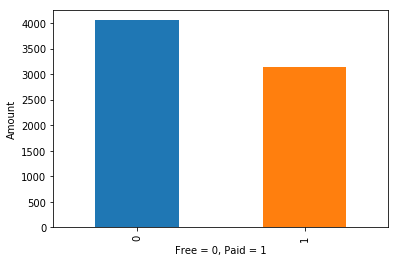

In [479]:
dataset.not_free.value_counts().plot.bar()
plt.xlabel("Free = 0, Paid = 1")
plt.ylabel("Amount")
plt.show()

<font size = "4"><bold> 4.5) Change ver from String to numerical value </bold></font>

In [480]:
# Transforms version numbers into String with only one <.>
# ver = String
def transform (ver):
    p_counter = 0
    for char in ver:
        if char == ".":
            p_counter = p_counter+1
    if p_counter == 1:
        return ver
    if p_counter == 2:
        var_splitted = ver.split(".")
        var_res = var_splitted[0]+"."+var_splitted[1]+var_splitted[2]
        return var_res
    elif p_counter == 3:
        var_splitted = ver.split(".")
        var_res = var_splitted[0]+"."+var_splitted[1]+var_splitted[2] + var_splitted[3]
        return var_res
    elif p_counter == 4:
        var_splitted = ver.split(".")
        var_res = var_splitted[0]+"."+var_splitted[1]+var_splitted[2] + var_splitted[3] + var_splitted[4]
    

tmp_ver_list = []
for row in dataset["ver"]:
    try:
        row_float = float(transform(row))
        tmp_ver_list.append(row_float)
    except ValueError:
        row_float = float("nan")
        tmp_ver_list.append(row_float)
    except TypeError:
        row_float = float("nan")
        tmp_ver_list.append(row_float)
dataset["ver"] = tmp_ver_list

<font size = "4"><bold> 4.6) Change cont rating to numerical value </bold></font>

In [481]:
cont_rating_fixed = []
for x in dataset.cont_rating:
    tmp = int(x.split("+")[0]) 
    cont_rating_fixed.append(tmp)

dataset["cont_rating"] = cont_rating_fixed

<font size = "4"><bold> 4.7) Change col names to match it against the android col names </bold></font>

In [482]:
dataset.rename(columns={"track_name": "name_length", "size_bytes": "size", "rating_count_tot": "reviews", "user_rating": "rating", "ver":"version", "prime_genre":"category", "rating_count_ver":"current_reviews", "user_rating_ver":"current_rating", "sup_devices.num":"sup_devs", "lang.num":"languages"}, inplace=True)

<font size = "4"><bold> 4.8) Transforming 0 ratings to NaN  </bold></font>

In [483]:
dataset["rating"] = np.where(dataset["rating"]==0, float("nan"), dataset["rating"])
dataset["current_rating"] = np.where(dataset["current_rating"]==0, float("nan"), dataset["current_rating"])


<font size = "4"><bold> 4.9) Change App Names to App Name Length  </bold></font>

In [484]:
tmp_name_list = []
for row in dataset.name_length:
    tmp_name_list.append(len(row))
dataset["name_length"] = tmp_name_list

<font size = "4"><bold> 4.10) Transform all version numbers >2500 to NaN due to faulty entries  </bold></font>

In [485]:
dataset["version"] = np.where(dataset["version"]>2500, float("nan"), dataset["version"])

<font size = "10"><bold> 5) Visualization / Descriptive Statistics </bold></font>

<font size = "4"><bold> 5.1) app name length: Mean, Median   </bold></font>

21.0
count    7197.000000
mean       25.582465
std        17.113720
min         2.000000
25%        13.000000
50%        21.000000
75%        35.000000
max       232.000000
Name: name_length, dtype: float64


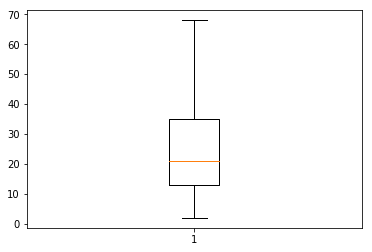

In [486]:
app_name_length_mean = dataset.name_length.mean()
app_name_length_median = dataset.name_length.median()
print(app_name_length_median)

print(dataset.name_length.describe())
plt.boxplot(dataset.name_length, 0, "");

<font size = "4"><bold> 5.2.1) Category: bar chart frequency of apps per category  </bold></font>

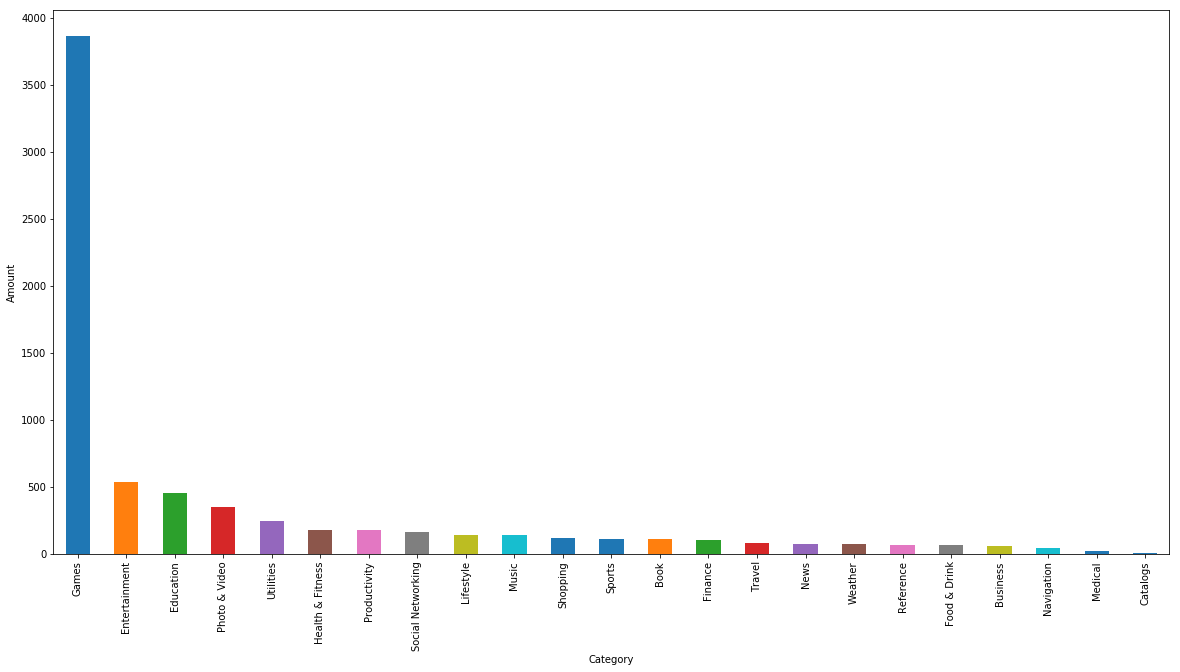

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: category, dtype: int64

In [487]:
dataset["category"].value_counts().plot(kind="bar", figsize=(20,10));
plt.xlabel("Category")
plt.ylabel("Amount")
plt.show()
dataset.category.value_counts()

<font size = "4"><bold> 5.2.2) Stacked Barplot for paid vs free apps, top five categories only</bold></font>

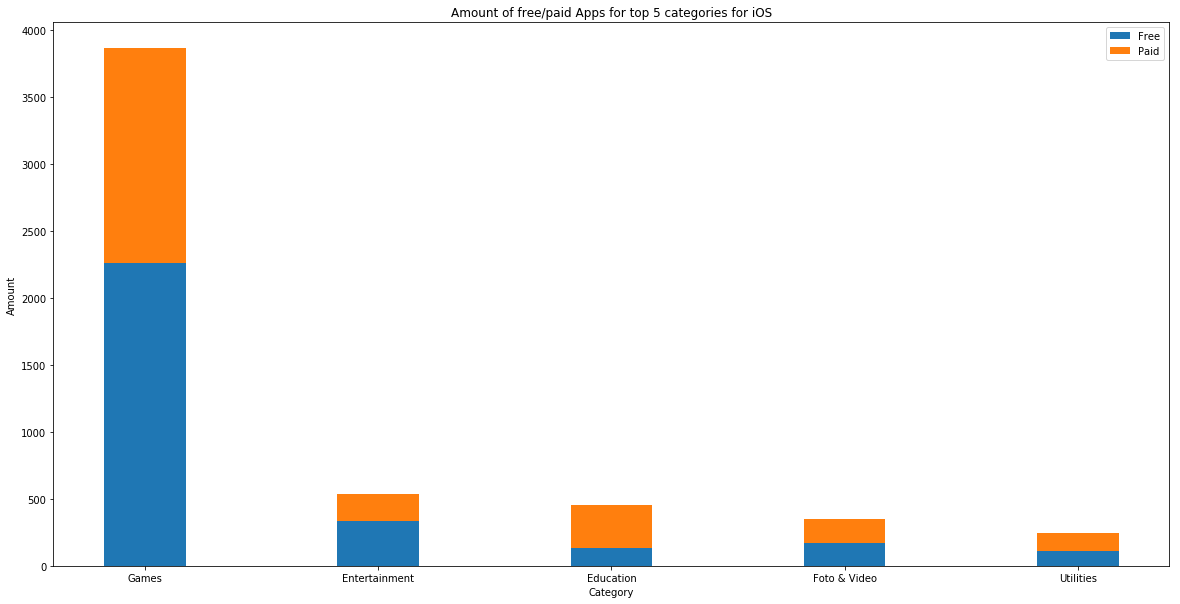

In [488]:
tmp_df = dataset.groupby(["category", "not_free"]).count()

tmp_df.drop(["size","price","reviews","current_reviews","rating","current_rating","version","cont_rating","sup_devs","languages"], axis=1, inplace=True)

N = 5
appFree = (2257, 334, 132, 167, 109)
appPaid = (1605, 201, 321, 182, 139)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(20, 10))
p1 = plt.bar(ind, appFree, width)
p2 = plt.bar(ind, appPaid, width,
             bottom=appFree)
plt.ylabel('Amount')
plt.xlabel('Category')
plt.title('Amount of free/paid Apps for top 5 categories for iOS')
plt.xticks(ind, ('Games', 'Entertainment', 'Education', 'Foto & Video', 'Utilities'))
plt.legend((p1[0], p2[0]), ('Free', 'Paid'))


plt.show()

<font size = "4"><bold> 5.3.1) rating: modus, boxplot, multiple boxplots, describe   </bold></font>

4.5
4.5
4.5
4.5
4.5
count    6268.000000
mean        4.049697
std         0.726943
min         1.000000
25%         4.000000
50%         4.500000
75%         4.500000
max         5.000000
Name: rating, dtype: float64


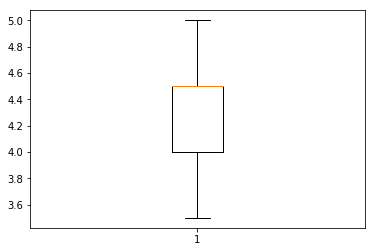

In [489]:
rating_modus = sts.mode(dataset.rating)
rating_modus_4 = sts.mode(dataset[dataset["cont_rating"]==4].rating)
rating_modus_9 = sts.mode(dataset[dataset["cont_rating"]==9].rating)
rating_modus_12 = sts.mode(dataset[dataset["cont_rating"]==12].rating)
rating_modus_17= sts.mode(dataset[dataset["cont_rating"]==17].rating)
print(rating_modus)
print(rating_modus_4)
print(rating_modus_9)
print(rating_modus_12)
print(rating_modus_17)

tmp_rating = dataset.rating[~np.isnan(dataset.rating)]
plt.boxplot(tmp_rating,0,"")
print(dataset.rating.describe())

count    6268.000000
mean        4.049697
std         0.726943
min         1.000000
25%         4.000000
50%         4.500000
75%         4.500000
max         5.000000
Name: rating, dtype: float64


Text(0.5, 1.0, 'iOS')

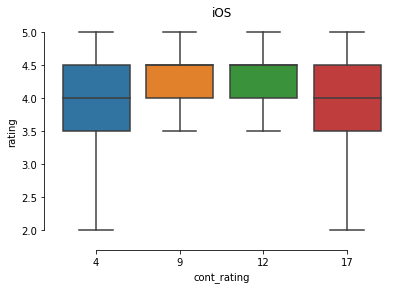

In [490]:
print(dataset.rating.describe())

g = sns.boxplot(x="cont_rating", y="rating", data=dataset, showfliers = False)
sns.despine(offset=10, trim=True)
g.set_title("iOS")

In [491]:
dataset[dataset["cont_rating"]==4].rating.describe()

count    3937.000000
mean        4.019939
std         0.747401
min         1.000000
25%         3.500000
50%         4.000000
75%         4.500000
max         5.000000
Name: rating, dtype: float64

In [492]:
dataset[dataset["cont_rating"]==9].rating.describe()

count    886.000000
mean       4.199210
std        0.571537
min        1.000000
25%        4.000000
50%        4.500000
75%        4.500000
max        5.000000
Name: rating, dtype: float64

In [493]:
dataset[dataset["cont_rating"]==12].rating.describe()

count    1004.000000
mean        4.103088
std         0.696509
min         1.000000
25%         4.000000
50%         4.500000
75%         4.500000
max         5.000000
Name: rating, dtype: float64

In [494]:
dataset[dataset["cont_rating"]==17].rating.describe()

count    441.000000
mean       3.893424
std        0.826398
min        1.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: rating, dtype: float64

<font size = "4"><bold> 5.3.2) current rating: modus, boxplot, multiple boxplots, describe   </bold></font>

4.5
4.5
4.5
4.5
4.5
count    5754.000000
mean        4.069517
std         0.879711
min         1.000000
25%         4.000000
50%         4.500000
75%         4.500000
max         5.000000
Name: current_rating, dtype: float64


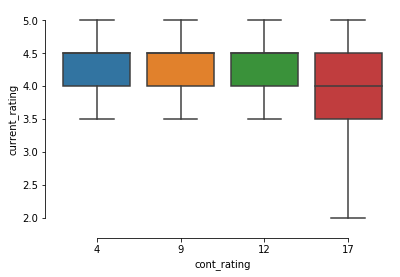

In [495]:
current_rating_modus = sts.mode(dataset.current_rating)
current_rating_modus_4 = sts.mode(dataset[dataset["cont_rating"]==4].current_rating)
current_rating_modus_9 = sts.mode(dataset[dataset["cont_rating"]==9].current_rating)
current_rating_modus_12 = sts.mode(dataset[dataset["cont_rating"]==12].current_rating)
current_rating_modus_17= sts.mode(dataset[dataset["cont_rating"]==17].current_rating)
print(current_rating_modus)
print(current_rating_modus_4)
print(current_rating_modus_9)
print(current_rating_modus_12)
print(current_rating_modus_17)

print(dataset.current_rating.describe())

sns.boxplot(x="cont_rating", y="current_rating", data=dataset, showfliers = False)
sns.despine(offset=10, trim=True)

In [496]:
dataset[dataset["cont_rating"]==4].current_rating.describe()

count    3626.000000
mean        4.052537
std         0.909527
min         1.000000
25%         4.000000
50%         4.500000
75%         4.500000
max         5.000000
Name: current_rating, dtype: float64

In [497]:
dataset[dataset["cont_rating"]==9].current_rating.describe()

count    857.000000
mean       4.210618
std        0.646462
min        1.000000
25%        4.000000
50%        4.500000
75%        4.500000
max        5.000000
Name: current_rating, dtype: float64

In [498]:
dataset[dataset["cont_rating"]==12].current_rating.describe()

count    922.000000
mean       4.092733
std        0.821350
min        1.000000
25%        4.000000
50%        4.500000
75%        4.500000
max        5.000000
Name: current_rating, dtype: float64

In [499]:
dataset[dataset["cont_rating"]==17].current_rating.describe()

count    349.000000
mean       3.838109
std        1.120733
min        1.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: current_rating, dtype: float64

<font size = "4"><bold> 5.4) reviews: mean, median  </bold></font>

12892.907183548701
300.0
count    7.197000e+03
mean     1.289291e+04
std      7.573941e+04
min      0.000000e+00
25%      2.800000e+01
50%      3.000000e+02
75%      2.793000e+03
max      2.974676e+06
Name: reviews, dtype: float64


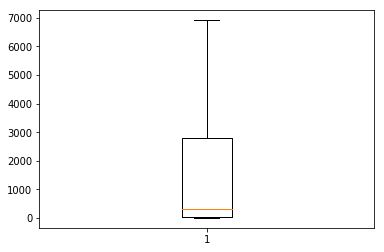

In [500]:
reviews_mean = dataset.reviews.mean()
print(reviews_mean)
reviews_median = dataset.reviews.median()
print(reviews_median)

plt.boxplot(dataset.reviews, 0, "")
print(dataset.reviews.describe())

<font size = "4"><bold> 5.5) size: boxplot </bold></font>

count    7197.000000
mean      199.134454
std       359.206914
min         0.589824
25%        46.922752
50%        97.153024
75%       181.924864
max      4025.969664
Name: size, dtype: float64

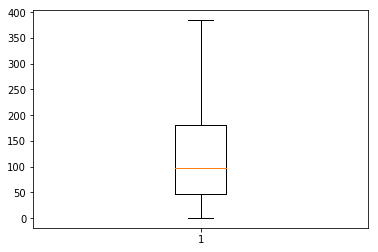

In [501]:
plt.boxplot(dataset["size"],0,"")
dataset["size"].describe()

<font size = "4"><bold> 5.6) price: avg, std for the whole DS and once or the price >0</bold></font>

count    7197.000000
mean        1.726218
std         5.833006
min         0.000000
25%         0.000000
50%         0.000000
75%         1.990000
max       299.990000
Name: price, dtype: float64
count    3141.000000
mean        3.955298
std         8.315882
min         0.990000
25%         1.990000
50%         2.990000
75%         4.990000
max       299.990000
Name: price, dtype: float64


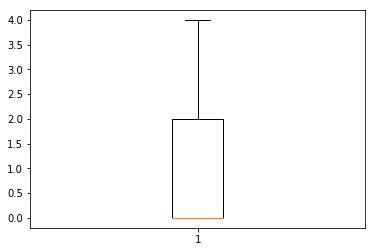

In [502]:
dataset_price_onlypaid = dataset[dataset["price"]>0]

plt.boxplot(dataset.price, 0, "");
print(dataset.price.describe())

#plt.boxplot(dataset_price_onlypaid.price, 0, "");
print(dataset_price_onlypaid.price.describe())

<font size = "4"><bold> 5.6) app version: avg, std  </bold></font>

4.213488360687231 57.033527628434115 1.52


count    7145.000000
mean        4.213488
std        57.033528
min         0.000900
25%         1.110000
50%         1.520000
75%         3.020000
max      2017.600000
Name: version, dtype: float64

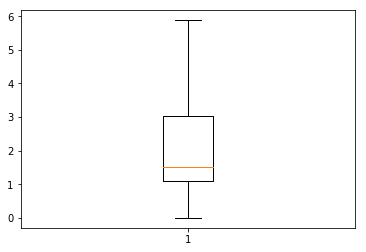

In [503]:
app_ver_mean = dataset.version.mean()
app_ver_std = dataset.version.std()
app_ver_med = dataset.version.median()

tmp_version = dataset.version[~np.isnan(dataset.version)]

print(app_ver_mean, app_ver_std, app_ver_med)
# Manche Apps haben große Versionsnummern, zB NBA 
plt.boxplot(tmp_version, 0, "");
dataset.version.describe()


<font size = "4"><bold> 5.7) Current reviews</bold></font>

count      7197.000000
mean        460.373906
std        3920.455183
min           0.000000
25%           1.000000
50%          23.000000
75%         140.000000
max      177050.000000
Name: current_reviews, dtype: float64

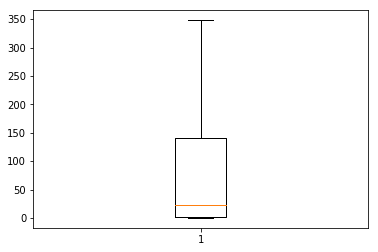

In [504]:
plt.boxplot(dataset.current_reviews, 0, "")
dataset.current_reviews.describe()

<font size = "4"><bold> 5.8) current Ratings</bold></font>

4.5
count    5754.000000
mean        4.069517
std         0.879711
min         1.000000
25%         4.000000
50%         4.500000
75%         4.500000
max         5.000000
Name: current_rating, dtype: float64


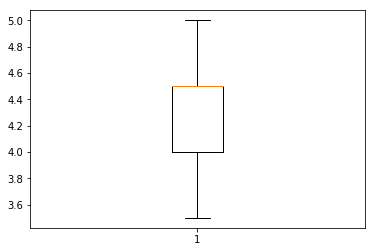

In [505]:
current_rating_modus = sts.mode(dataset.current_rating)
print(current_rating_modus)
tmp_current_rating = dataset.current_rating[~np.isnan(dataset.current_rating)]
plt.boxplot(tmp_current_rating,0,"")
print(dataset.current_rating.describe())

<font size = "4"><bold> 5.9) Content Rating</bold></font>

count    7197.000000
mean        7.093094
std         4.329046
min         4.000000
25%         4.000000
50%         4.000000
75%         9.000000
max        17.000000
Name: cont_rating, dtype: float64

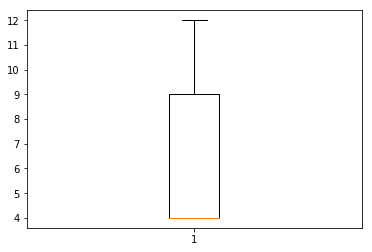

In [506]:
plt.boxplot(dataset.cont_rating, 0, "")
dataset.cont_rating.describe()

<font size = "4"><bold> 5.10) Supported Devices</bold></font>

count    7197.000000
mean       37.361817
std         3.737715
min         9.000000
25%        37.000000
50%        37.000000
75%        38.000000
max        47.000000
Name: sup_devs, dtype: float64

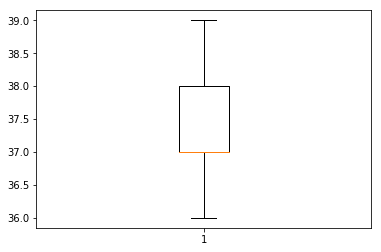

In [507]:
plt.boxplot(dataset.sup_devs, 0, "")
dataset.sup_devs.describe()

<font size = "4"><bold> 5.11) Languages</bold></font>

count    7197.000000
mean        5.434903
std         7.919593
min         0.000000
25%         1.000000
50%         1.000000
75%         8.000000
max        75.000000
Name: languages, dtype: float64

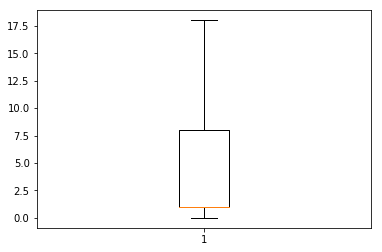

In [508]:
plt.boxplot(dataset.languages, 0, "")
dataset.languages.describe()

<font size = "4"><bold> 5.2) Catplots for rating with reviews size and name_length</bold></font>

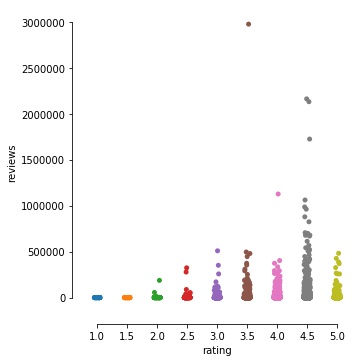

In [509]:
g=sns.catplot(x="rating", y="reviews", data=dataset)
sns.despine(offset=10, trim=True)

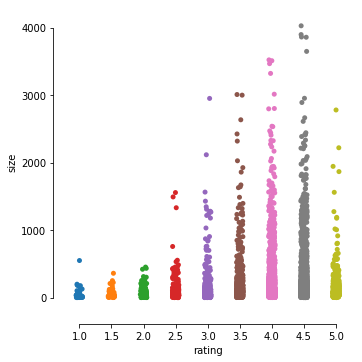

In [510]:
sns.catplot(x="rating", y="size", data=dataset)
sns.despine(offset=10, trim=True)

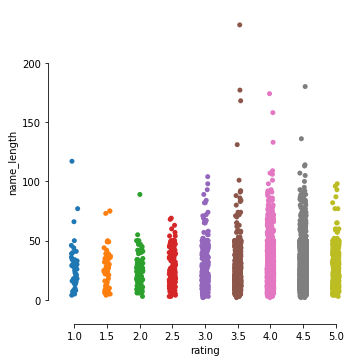

In [511]:
sns.catplot(x="rating", y="name_length", data=dataset)
sns.despine(offset=10, trim=True)

<font size = "4"><bold> 5.3) content rating pie chart</bold></font>

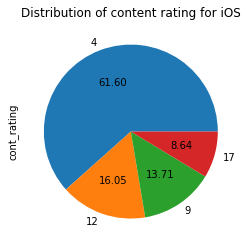

In [512]:
dataset.cont_rating.value_counts().plot(kind="pie", autopct="%.2f", title="Distribution of content rating for iOS");

<font size = "4"><bold> 5.4) price/size & cont/size with scatterplot</bold></font>

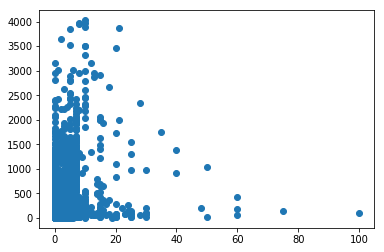

In [513]:
plt.scatter(dataset[dataset["price"]<200].price, dataset[dataset["price"]<200]["size"]);

<font size = "10"><bold> 6) Cross Dataset Visualization</bold></font>

<font size = "10"><bold> 7) Inductive Analysis</bold></font>

<font size = "4"><bold> 7.1) Correlations</bold></font>

In [514]:
corr = dataset.corr()
corr.style.background_gradient(cmap="Reds")

,name_length,size,price,reviews,current_reviews,rating,current_rating,version,cont_rating,sup_devs,languages,not_free
name_length,1,0.0617407,0.0424449,-0.0395095,-0.00659506,-0.00109549,0.000288389,0.00271821,-0.0392015,-0.0773706,0.0355869,0.0764325
size,0.0617407,1,0.182392,0.00448632,0.00633717,0.0574022,0.0560569,0.000735388,0.140541,-0.118347,0.00461435,0.161979
price,0.0424449,0.182392,1,-0.0390442,-0.0180118,0.0192874,0.014362,0.0200287,-0.0296658,-0.115361,-0.00671336,0.336317
reviews,-0.0395095,0.00448632,-0.0390442,1,0.163645,0.0553418,0.0369695,0.0208428,0.00913924,0.00883232,0.137675,-0.102885
current_reviews,-0.00659506,0.00633717,-0.0180118,0.163645,1,0.0634079,0.0573257,-0.00028265,0.00143473,0.0379507,0.0132869,-0.031604
rating,-0.00109549,0.0574022,0.0192874,0.0553418,0.0634079,1,0.719504,0.00334474,0.0103192,0.048653,0.0865073,0.00181629
current_rating,0.000288389,0.0560569,0.014362,0.0369695,0.0573257,0.719504,1,0.00718425,-0.0134085,0.0347195,0.0881177,-0.0028155
version,0.00271821,0.000735388,0.0200287,0.0208428,-0.00028265,0.00334474,0.00718425,1,0.0129952,-0.0201335,0.0349131,-0.0114311
cont_rating,-0.0392015,0.140541,-0.0296658,0.00913924,0.00143473,0.0103192,-0.0134085,0.0129952,1,0.0200846,-0.0695084,-0.0708976
sup_devs,-0.0773706,-0.118347,-0.115361,0.00883232,0.0379507,0.048653,0.0347195,-0.0201335,0.0200846,1,-0.0416811,-0.0201999


<font size = "4"><bold> 7.2) Chi Squared independence tests </bold></font>

Liegt p_value<=0.05 wird Nullhypothese verworfen und es liegt ein statistisch signifikanter  Zusammenhang vor. Liegt der p_value darüber, hat man keinen signifikanten Zusammenhang.

Hier wird mit einer copy vom dataset gearbeitet, bei der alle Reihen mit missing values entfernt worden sind (Voraussetzung für chi squared).

In [515]:
##dataset_tmp = dataset

#for x in dataset_tmp["version"]:
 #   if np.isnan(x):
  #      dataset_tmp.drop(row, inplace=True)

#dataset_tmp.dropna(0, inplace=True)

Test size <-> Rating, we'll not use any chi squared tests! For demonstration only

In [516]:
#dataset_tmp.shape

#obs = np.array([dataset_tmp["size"], dataset_tmp["rating"]])

#stats.chi2_contingency(obs)[0:3]

<font size = "4"><bold> 7.3) Regressions</bold></font>

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     204.9
Date:                Thu, 10 Jan 2019   Prob (F-statistic):               0.00
Time:                        16:12:23   Log-Likelihood:                -3975.3
No. Observations:                5712   AIC:                             8017.
Df Residuals:                    5679   BIC:                             8236.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

C:\Users\andre\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


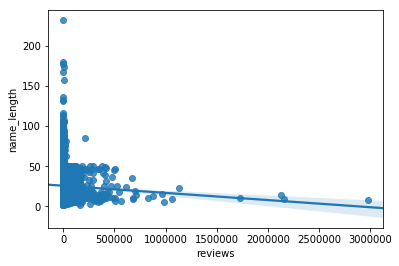

In [517]:
result = sm.ols(formula="rating ~ price + size + reviews + name_length + version + category + current_rating + current_reviews + languages + sup_devs + cont_rating", data=dataset).fit()
print(result.summary())
sns.regplot(x="reviews", y="name_length", data = dataset)

C:\Users\andre\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


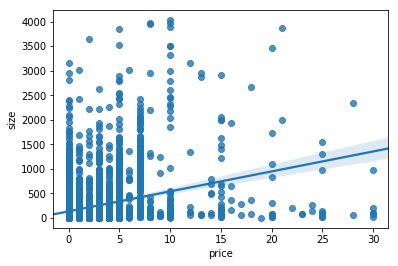

In [518]:
sns.regplot(x="price", y="size", data = dataset[dataset.price<30])

<font size = "8"><bold> Regression only with games data</bold></font>

In [519]:
dataset_games = dataset[dataset["category"]=="Games"]

In [520]:
result = sm.ols(formula="rating ~ price + size + reviews + name_length + version + current_rating + current_reviews + sup_devs + languages + cont_rating", data=dataset_games).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     368.3
Date:                Thu, 10 Jan 2019   Prob (F-statistic):               0.00
Time:                        16:12:25   Log-Likelihood:                -1641.8
No. Observations:                3234   AIC:                             3306.
Df Residuals:                    3223   BIC:                             3373.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.4837      0.092     

<font size = "7"><bold> Regression only with entertainment data</bold></font>

In [521]:
dataset_entertainment = dataset[dataset["category"]=="Entertainment"]

In [522]:
result = sm.ols(formula="rating ~ price + size + reviews + name_length + version + current_rating + current_reviews + sup_devs + languages + cont_rating", data=dataset_entertainment).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     42.36
Date:                Thu, 10 Jan 2019   Prob (F-statistic):           5.16e-57
Time:                        16:12:25   Log-Likelihood:                -377.35
No. Observations:                 417   AIC:                             776.7
Df Residuals:                     406   BIC:                             821.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.0266      0.301     

<font size = "7"><bold> Regression only with education data </bold></font>

In [523]:
dataset_education = dataset[dataset["category"]=="Education"]

In [524]:
result = sm.ols(formula="rating ~ price + size + reviews + name_length + version + current_rating + current_reviews + sup_devs + languages + cont_rating", data=dataset_education).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     38.67
Date:                Thu, 10 Jan 2019   Prob (F-statistic):           9.37e-50
Time:                        16:12:25   Log-Likelihood:                -225.92
No. Observations:                 339   AIC:                             473.8
Df Residuals:                     328   BIC:                             515.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.2349      0.251     

<font size = "10"><bold> Regression with only photo & video data</bold></font>


In [525]:
dataset_photo_video = dataset[dataset["category"]=="Photo & Video"]

In [526]:
result = sm.ols(formula="rating ~ price + size + reviews + name_length + version + current_rating + current_reviews + sup_devs + languages + cont_rating", data=dataset_photo_video).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     42.94
Date:                Thu, 10 Jan 2019   Prob (F-statistic):           7.06e-51
Time:                        16:12:25   Log-Likelihood:                -195.25
No. Observations:                 291   AIC:                             412.5
Df Residuals:                     280   BIC:                             452.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6672      0.356     

<font size = "10"><bold> Regression with only utilitites data</bold></font>

In [527]:
dataset_utilities = dataset[dataset["category"]=="Utilities"]

In [528]:
result = sm.ols(formula="rating ~ price + size + reviews + name_length + version + current_rating + current_reviews + sup_devs + languages + cont_rating", data=dataset_utilities).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     18.14
Date:                Thu, 10 Jan 2019   Prob (F-statistic):           7.53e-23
Time:                        16:12:25   Log-Likelihood:                -192.85
No. Observations:                 196   AIC:                             407.7
Df Residuals:                     185   BIC:                             443.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.8935      0.566     

<font size = "10"><bold> Regression with only paid apps</bold></font>

In [529]:
dataset_paid = dataset[dataset["not_free"]==1]
result = sm.ols(formula="rating ~ price + size + reviews + name_length + version + current_rating + current_reviews + sup_devs + languages + cont_rating + category", data=dataset_paid).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     112.9
Date:                Thu, 10 Jan 2019   Prob (F-statistic):               0.00
Time:                        16:12:25   Log-Likelihood:                -1781.8
No. Observations:                2682   AIC:                             3630.
Df Residuals:                    2649   BIC:                             3824.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [530]:
dataset_paid = dataset[dataset["not_free"]==1]
result = sm.ols(formula="size ~ price + rating + reviews + name_length + version + current_rating + current_reviews + sup_devs + languages + cont_rating + category", data=dataset_paid).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   size   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     26.23
Date:                Thu, 10 Jan 2019   Prob (F-statistic):          1.48e-133
Time:                        16:12:25   Log-Likelihood:                -19928.
No. Observations:                2682   AIC:                         3.992e+04
Df Residuals:                    2649   BIC:                         4.012e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [531]:
dataset_paid = dataset[dataset["not_free"]==1]
result = sm.ols(formula="reviews ~ price + size + rating + name_length + version + current_rating + current_reviews + sup_devs + languages + cont_rating + category", data=dataset_paid).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                reviews   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     14.00
Date:                Thu, 10 Jan 2019   Prob (F-statistic):           2.09e-68
Time:                        16:12:25   Log-Likelihood:                -31053.
No. Observations:                2682   AIC:                         6.217e+04
Df Residuals:                    2649   BIC:                         6.237e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

<font size = "10"><bold> Regression with only free apps </bold></font>

In [532]:
dataset_free = dataset[dataset["not_free"]==0]
result = sm.ols(formula="rating ~ price + size + reviews + name_length + version + current_rating + current_reviews + sup_devs + languages + cont_rating + category", data=dataset_free).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     101.8
Date:                Thu, 10 Jan 2019   Prob (F-statistic):               0.00
Time:                        16:12:25   Log-Likelihood:                -2141.2
No. Observations:                3030   AIC:                             4346.
Df Residuals:                    2998   BIC:                             4539.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [533]:
dataset_free = dataset[dataset["not_free"]==0]
result = sm.ols(formula="size ~ price + rating + reviews + name_length + version + current_rating + current_reviews + sup_devs + languages + cont_rating + category", data=dataset_free).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   size   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     10.74
Date:                Thu, 10 Jan 2019   Prob (F-statistic):           3.43e-49
Time:                        16:12:25   Log-Likelihood:                -20480.
No. Observations:                3030   AIC:                         4.102e+04
Df Residuals:                    2998   BIC:                         4.122e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [534]:
dataset_free = dataset[dataset["not_free"]==0]
result = sm.ols(formula="reviews ~ price + size + rating + name_length + version + current_rating + current_reviews + sup_devs + languages + cont_rating + category", data=dataset_free).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                reviews   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     6.400
Date:                Thu, 10 Jan 2019   Prob (F-statistic):           2.55e-25
Time:                        16:12:25   Log-Likelihood:                -39434.
No. Observations:                3030   AIC:                         7.893e+04
Df Residuals:                    2998   BIC:                         7.913e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

Regression von allen variablen auf size

In [535]:
result = sm.ols(formula="size ~ price + rating + reviews + name_length + version + category + current_rating + current_reviews + languages + sup_devs + cont_rating", data=dataset).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   size   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     41.43
Date:                Thu, 10 Jan 2019   Prob (F-statistic):          1.27e-230
Time:                        16:12:26   Log-Likelihood:                -41164.
No. Observations:                5712   AIC:                         8.239e+04
Df Residuals:                    5679   BIC:                         8.261e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [536]:
result = sm.ols(formula="size ~ price + rating + reviews + name_length + version + category + current_rating + current_reviews + languages + sup_devs + cont_rating", data=dataset_games).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   size   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     129.2
Date:                Thu, 10 Jan 2019   Prob (F-statistic):          2.48e-227
Time:                        16:12:26   Log-Likelihood:                -23774.
No. Observations:                3234   AIC:                         4.757e+04
Df Residuals:                    3223   BIC:                         4.764e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         795.4784     88.897     

In [537]:
result = sm.ols(formula="reviews ~ price + rating + size + name_length + version + category + current_rating + current_reviews + languages + sup_devs + cont_rating", data=dataset).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                reviews   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     11.11
Date:                Thu, 10 Jan 2019   Prob (F-statistic):           2.44e-54
Time:                        16:12:26   Log-Likelihood:                -72737.
No. Observations:                5712   AIC:                         1.455e+05
Df Residuals:                    5679   BIC:                         1.458e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [538]:
result = sm.ols(formula="reviews ~ price + rating + size + name_length + version + category + current_rating + current_reviews + languages + sup_devs + cont_rating", data=dataset_games).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                reviews   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     19.72
Date:                Thu, 10 Jan 2019   Prob (F-statistic):           8.79e-36
Time:                        16:12:26   Log-Likelihood:                -40869.
No. Observations:                3234   AIC:                         8.176e+04
Df Residuals:                    3223   BIC:                         8.183e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -760.8242   1.78e+04     

In [539]:
result = sm.ols(formula="price ~ size + rating + reviews + name_length + version + category + current_rating + current_reviews + languages + sup_devs + cont_rating", data=dataset).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     21.64
Date:                Thu, 10 Jan 2019   Prob (F-statistic):          2.24e-117
Time:                        16:12:26   Log-Likelihood:                -16671.
No. Observations:                5712   AIC:                         3.341e+04
Df Residuals:                    5679   BIC:                         3.363e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [540]:
result = sm.ols(formula="price ~ size + rating + reviews + name_length + version + category + current_rating + current_reviews + languages + sup_devs + cont_rating", data=dataset_games).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     105.4
Date:                Thu, 10 Jan 2019   Prob (F-statistic):          8.90e-190
Time:                        16:12:26   Log-Likelihood:                -7019.1
No. Observations:                3234   AIC:                         1.406e+04
Df Residuals:                    3223   BIC:                         1.413e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.2194      0.503     